In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


# Context

***STAKEHOLDER*** : Property management company

***BUSINESS PROBLEM*** : Property management company is creating a new campaign that will target recent college graduates from local universities 
- The company knows this demographic will not be able to afford expensive properties 
    - Will be looking for smaller / less expensive places
    - Will be looking for places with more sq footage to split amongst many tennants 
- The company wants to have a better idea of what kinds of properties they should be promoting among this demographic  

# Obtain / Scrub

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Initial Observations** 

1) Columns with null data:
- waterfront
- yr_renovated
- view

2) sqft_basement is a string when it should probably be an int or float 

3) date column is not in datetime 

In [4]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
df['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

Over 2,000 null values
- this data could be filled given the distribution of waterfront properties 
    - Initially I feel like 2,000 is too much to replace 

In [6]:
#replacing null values based on the existing distribution of data from 'waterfront'
waterfront_dist = df['waterfront'].value_counts(normalize=True)
waterfront_na = df['waterfront'].isna()

df.loc[waterfront_na,'waterfront'] = np.random.choice(waterfront_dist.index, size=len(df[waterfront_na]), p=waterfront_dist.values)

In [7]:
# no more null values
# df['waterfront'].isna().value_counts()

In [8]:
# new values
# df['waterfront'].value_counts()

In [9]:
df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [10]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [11]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

Nearly 4,000 null values 
- a value of '0' indicates no renovations have taken place 
- 95% of houses have not recieved rennovations

In [12]:
ren_dist = df['yr_renovated'].value_counts(normalize=True)
ren_na = df['yr_renovated'].isna()

df.loc[ren_na,'yr_renovated'] = np.random.choice(ren_dist.index, size=len(df[ren_na]), p=ren_dist.values)

In [13]:
# no more null values
# df['yr_renovated'].isna().value_counts()

In [14]:
# new value distribution
# distributions have changed by the ten thousandth place 
# df['yr_renovated'].value_counts(normalize=True)

In [15]:
df['view'].isna().value_counts()

False    21534
True        63
Name: view, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21534 non-null  int64  
 11  grade          21534 non-null  int64  
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

### Cleaning sqft_basement

In [18]:
df[(df['sqft_basement'] == '?')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [19]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.594316
?         0.020990
600.0     0.010031
500.0     0.009706
700.0     0.009613
            ...   
784.0     0.000046
2130.0    0.000046
65.0      0.000046
1248.0    0.000046
2050.0    0.000046
Name: sqft_basement, Length: 302, dtype: float64

454 rows have the value "?", which makes it impossible to convert to a float
- Based on the relevance of basements being used as living space for the target demographic, I will not drop this data
- I am going to continue by filling '?' with values with respect to the distribution of exisitng values 

In [20]:
# replacing all '?' values with NaN to make replacing easier
df['sqft_basement'].replace(to_replace = '?', value=np.NaN, inplace=True)

basement_dist = df['sqft_basement'].value_counts(normalize=True)
basement_na = df['sqft_basement'].isna()

df.loc[basement_na,'sqft_basement'] = np.random.choice(basement_dist.index, size=len(df[basement_na]), p=basement_dist.values)

In [21]:
# no null values
# df['sqft_basement'].isna().value_counts()


In [22]:
#checking new distribution
#df['sqft_basement'].value_counts(normalize=True)

In [23]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

### Dealing with Duplicates

Because each house has a unique id ('id'), any duplicates will make analysis more difficult

In [24]:
df.drop_duplicates('id', keep='last', inplace=True)

In [25]:
# checking 
#print(df.info())
# len(df['id'].unique())

While I assume the repeated id's are from houses being sold more than once, I do not believe this will be a feature that I will be investigating, so I am keeping the most recent sale of each duplicated house

### Creating lot15/living15 Comparison Columns

I think it will be helpful to better understand how a property's living/lot space relative to their 15 neighbor's spaces will affect price

In [26]:
df['rel_lot'] = df['sqft_lot'] - df['sqft_lot15']
df['rel_living'] = df['sqft_living'] - df['sqft_living15']

<AxesSubplot:xlabel='rel_lot', ylabel='price'>

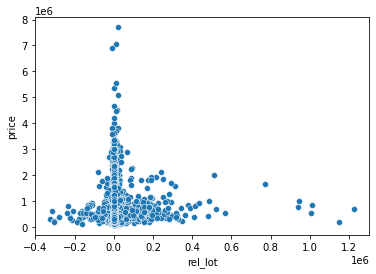

In [27]:
sns.scatterplot(x= 'rel_lot', y='price', data= df)

It would appear that the relative lot space does not any sort of linear relationship with price
- there are a seemingly equal ammount of houses that have negligible (close to 0) differences in lot sqftage that are valued from very low to very high ranges

<AxesSubplot:xlabel='rel_living', ylabel='price'>

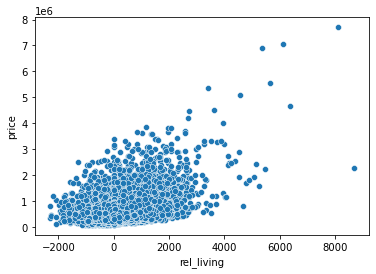

In [28]:
sns.scatterplot(x= 'rel_living', y='price', data= df)

It would appear that the relative living space has a negative linear relationship with price

### Checking Multicullinearity 

<AxesSubplot:>

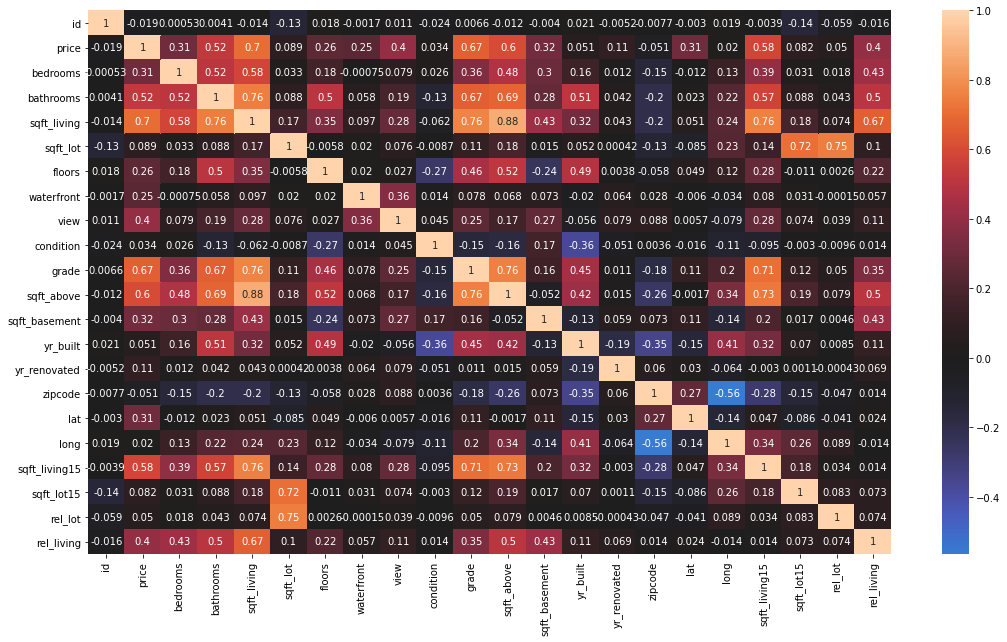

In [29]:
plt.figure(figsize=(18,10))
sns.heatmap(data = df.corr(), center=0, annot=True)

**Observations**
- The only disruptive correlations (above 0.75) are between sqft_living and sqft_above (0.86)
    - I will be dropping sqft_above, considering sqft_living already takes the upstairs living space into account
- This confirms that rel_lot does not have a correlation with price
    - however, rel_living might be useful for the model 

In [30]:
df.drop('sqft_above', axis=1, inplace=True)
df.drop('rel_lot', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

# Explore 

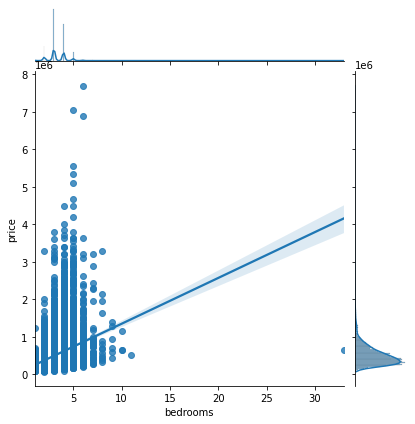

In [31]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')

I will need to investigate / remove the datapoint that has over 30 bedrooms

In [32]:
df[(df['bedrooms'] > 30)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_living
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,290


33 bedrooms with onlh 1620 sqft living space
- I am going to delete this datapoint

In [33]:
indexname = df[(df['bedrooms'] > 30)].index
df.drop(indexname, inplace=True)

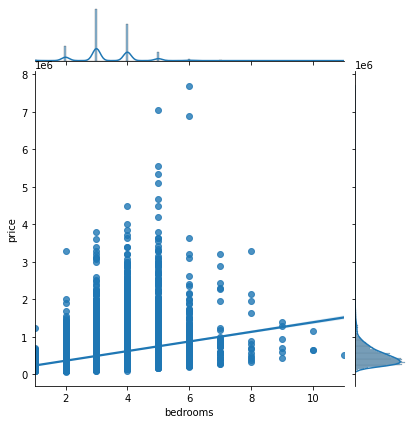

In [34]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')


11 bedrooms still seems unusual... but I will keep for now

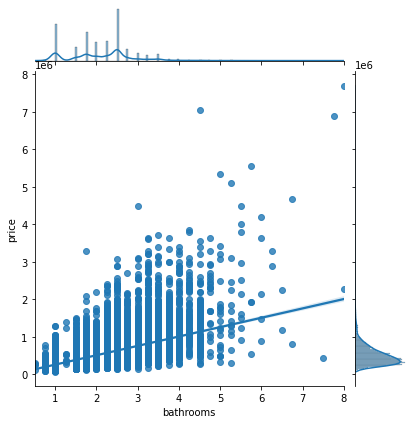

In [35]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')

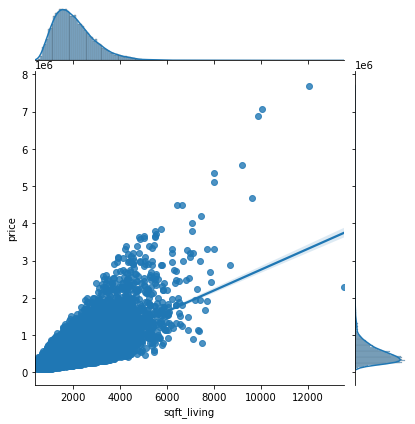

In [36]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')

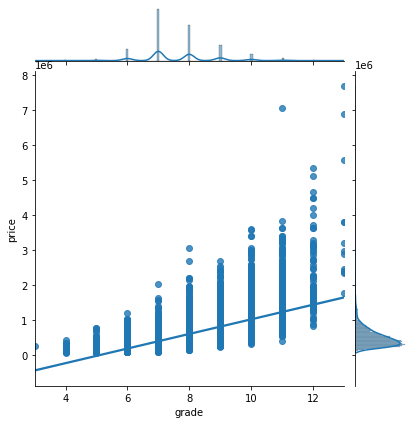

In [37]:
sns.jointplot(x='grade', y='price', data=df, kind='reg')

In [38]:
df['grade'].value_counts()

7     8862
8     6029
9     2595
6     1988
10    1126
11     394
5      234
12      87
4       27
13      13
3        1
Name: grade, dtype: int64

There are very few datapoints for grades 3 and 13, it will probably be beneficial to remove these after the baseline 

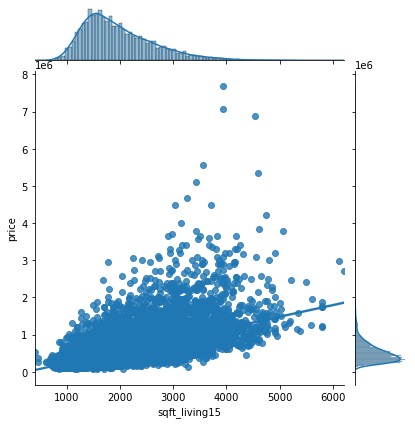

In [39]:
sns.jointplot(x='sqft_living15', y='price', data=df, kind='reg')

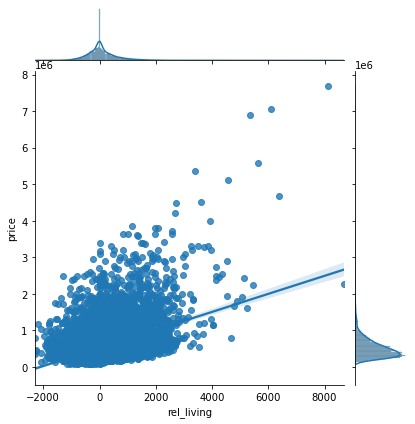

In [40]:
sns.jointplot(x='rel_living', y='price', data=df, kind='reg')

It would appear that as rel_living increases (as the difference between the living space of a property and the average of the the nearest 15 neighbors' living spaces increases) price also increases
- This may offer a better way of understanding the coefficients for sqft_living15

### Baseline Model

In [41]:
outcome = 'price'
predictors = df.drop('price', axis=1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables
model_baseline = ols(formula=formula, data=df).fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2744.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:32:38   Log-Likelihood:            -2.9110e+05
No. Observations:               21356   AIC:                         5.822e+05
Df Residuals:                   21337   BIC:                         5.824e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.693e+06   2.95e+06      2.951      0.003    2.92e+06    1.45e+07
id            -1.485e-06   4.85e-07     -3.060      0.002   -2.44e-06   -5.34e-07
bedrooms      -3.991e+04   1994.819    -20.006      0.000   -4.38e+04    -3.6e+04
bathrooms      4.262e+04   3279.295     12.997      0.000    3.62e+04     4.9e+04
sqft_living     127.4787      2.261     56.372      0.000     123.046     131.911
sqft_lot          0.1170      0.048      2.435      0.015       0.023       0.211
floors         9593.1655   3585.037      2.676      0.007    2566.223    1.66e+04
waterfront     5.242e+05    1.7e+04     30.905      0.000    4.91e+05    5.57e+05
view           5.708e+04   2115.407     26.985      0.000    5.29e+04    6.12e+04
condition      2.536e+04   2357.475     10.757      0.000    2.07e+04       3e+04
grade          9.691e+04   2172.448     44.609      0.000    9.27e+04    1.01e+05
sqft_basement   -26.0008      4.295     -6.054      0.000     -34.420     -17.582
yr_built      -2691.9116     71.756    -37.515      0.000   -2832.559   -2551.264
yr_renovated     18.1751      3.607      5.039      0.000      11.105      25.245
zipcode        -594.9968     33.200    -17.922      0.000    -660.071    -529.923
lat             5.96e+05   1.08e+04     55.264      0.000    5.75e+05    6.17e+05
long          -2.123e+05   1.32e+04    -16.058      0.000   -2.38e+05   -1.86e+05
sqft_living15    74.1916      2.142     34.643      0.000      69.994      78.389
sqft_lot15       -0.4125      0.074     -5.602      0.000      -0.557      -0.268
rel_living       53.2933      1.988     26.808      0.000      49.397      57.190
==============================================================================
Omnibus:                    18023.686   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1783727.907
Skew:                           3.528   Prob(JB):                         0.00
Kurtosis:                      47.213   Cond. No.                     1.62e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.39e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation**
- Baseline model seems to be moderately good at explaining variations in price 
- All variables seem to be be well below a = 0.05
- rel_living coeff = 53.1597
    - for every 1 additional sqft the property has above sqft_living15, price increases 53.16
- Negative coefficients:
    - bedrooms
        - For 1 addition bedroom price drops approx 36,500
        - this is counterintuitive... hopefully it will change as optimization occurs
    - sqft_basement
        - For 1 addition sqft of basement price drops approx 26
        - this is also counterintuitive 
    - yr_built
        - I can understand this being negative, if older houses being sold are larger / historical
    - sqft_lot15
        - very small negative coefficient


**Features to Drop**
- id (does not provide relevant information pertaining to price)

#### Baseline  Test

In [42]:
X = df.drop("price", axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)




In [43]:
baseline_linreg = LinearRegression()

baseline_linreg.fit(X_train, y_train)

y_pred = baseline_linreg.predict(X_test)

residuals = y_pred - y_test

In [44]:
baseline_linreg.coef_

array([-1.79312334e-06, -3.80866174e+04,  3.91849492e+04,  1.24755274e+02,
        1.92241525e-01,  1.08106795e+04,  5.73933103e+05,  5.43311361e+04,
        2.37232813e+04,  9.87963089e+04, -2.58208847e+01, -2.66914515e+03,
        1.81255597e+01, -5.85374420e+02,  6.03639641e+05, -2.03802854e+05,
        7.45256623e+01, -4.13819534e-01,  5.02296119e+01])

Train RMSE: 197732.33732358497
Test RMSE: 211487.20275253616
Test Difference: 13754.86542895119


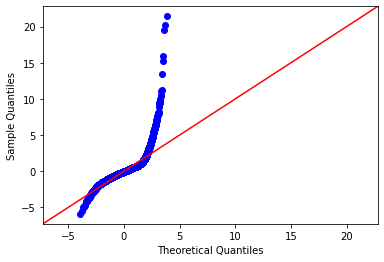

In [45]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

residuals = model_baseline.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))
print('Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train))
fig.show()

**Interpretation**
- Based on the QQ Plot the residuals do not follow a normal distribution
- I will be applying the assumptions based on the business problem to deal with extreme values / outliers 

# Adding Corresponding Cities to Zipcodes

Right now it will be much too difficult to have any meaningful geographical insights using zipcodes, lat, or long 
- 70 zipcodes is too much to include in the model
- long and lat is too vague

Using the 'All Zipcodes and PO Box as Centroids for King County / zipcode all point'.csv file (source below), I will be able to create a new column that will assign a corresponding city based on the zip code, greatly reducing the geogrpahical features in my model

source: https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::all-zipcodes-and-po-box-as-centroids-for-king-county-zipcode-all-point/about

### Initial Cleaning

In [46]:
kc_zip = pd.read_csv('data/kc_zip.csv')

In [47]:
kc_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               261 non-null    float64
 1   Y               261 non-null    float64
 2   OBJECTID        261 non-null    int64  
 3   ZIP             261 non-null    int64  
 4   ZIPCODE         261 non-null    int64  
 5   COUNTY          260 non-null    float64
 6   ZIP_TYPE        261 non-null    object 
 7   PREFERRED_CITY  261 non-null    object 
 8   FEATURE_SOURCE  261 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 18.5+ KB


In [48]:
kc_zip.drop(['X', 'Y', 'OBJECTID', 'ZIP', 'COUNTY', 'ZIP_TYPE', 'FEATURE_SOURCE'], axis=1, inplace=True )

kc_zip['zipcode'] = kc_zip['ZIPCODE']
kc_zip.drop('ZIPCODE', axis=1, inplace=True)

kc_zip['city'] = kc_zip['PREFERRED_CITY']
kc_zip.drop('PREFERRED_CITY', axis=1, inplace=True)

# kc_zip

In [49]:
kc_zip[(kc_zip['city'] == 'SAMMAMIISH')]

,zipcode,city
109,98075,SAMMAMIISH


In [50]:
kc_zip.replace(to_replace='SAMMAMIISH', value='SAMMAMISH', inplace=True)

In [51]:
zip_list = df['zipcode'].unique().tolist()
# len(zip_list)

In [52]:
for index, contents in kc_zip.iterrows():
    if contents['zipcode'] not in zip_list:
        kc_zip.drop(labels=[index], inplace=True)
        
# kc_zip

In [53]:
kc_zip.duplicated().sum()

4

In [54]:
kc_zip.drop_duplicates(keep='first', inplace=True)

In [55]:
merged = pd.merge(df, kc_zip, how='left')

# merged

In [56]:
merged['city'].value_counts(normalize=True)

SEATTLE          0.414731
RENTON           0.073797
BELLEVUE         0.065228
KENT             0.055722
KIRKLAND         0.045608
REDMOND          0.045374
AUBURN           0.042236
SAMMAMISH        0.037086
FEDERAL WAY      0.035774
ISSAQUAH         0.034089
MAPLE VALLEY     0.027299
WOODINVILLE      0.021821
SNOQUALMIE       0.014235
KENMORE          0.013158
MERCER ISLAND    0.013064
ENUMCLAW         0.010863
NORTH BEND       0.010208
BOTHELL          0.009037
DUVALL           0.008897
CARNATION        0.005760
VASHON           0.005432
BLACK DIAMOND    0.004636
FALL CITY        0.003652
MEDINA           0.002294
Name: city, dtype: float64

40% of properties in data set are within Seattle 

In [57]:
merged.shape[0] - df.shape[0]

0

In [58]:
merged.duplicated().sum()

0

In [59]:
merged.shape

(21356, 21)

In [60]:
merged.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
rel_living       0
city             0
dtype: int64

In [61]:
merged['city'] = merged['city'].str.replace(' ', '_')

# merged

### Exploring Cities 

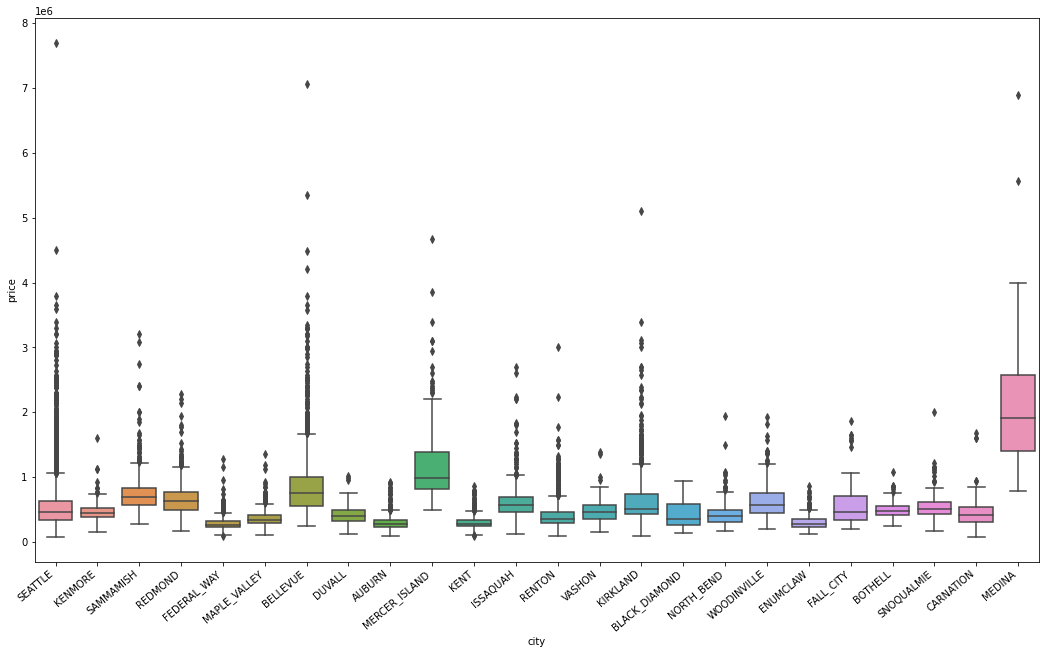

In [62]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(ax=ax, x='city', y = 'price', data= merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

- A lot of outliers
- I think it will be beneficial exploring the behavior of my model by removing more outliers 
- I think I will create another model with all categories including cities to see how they change relationships of other features 

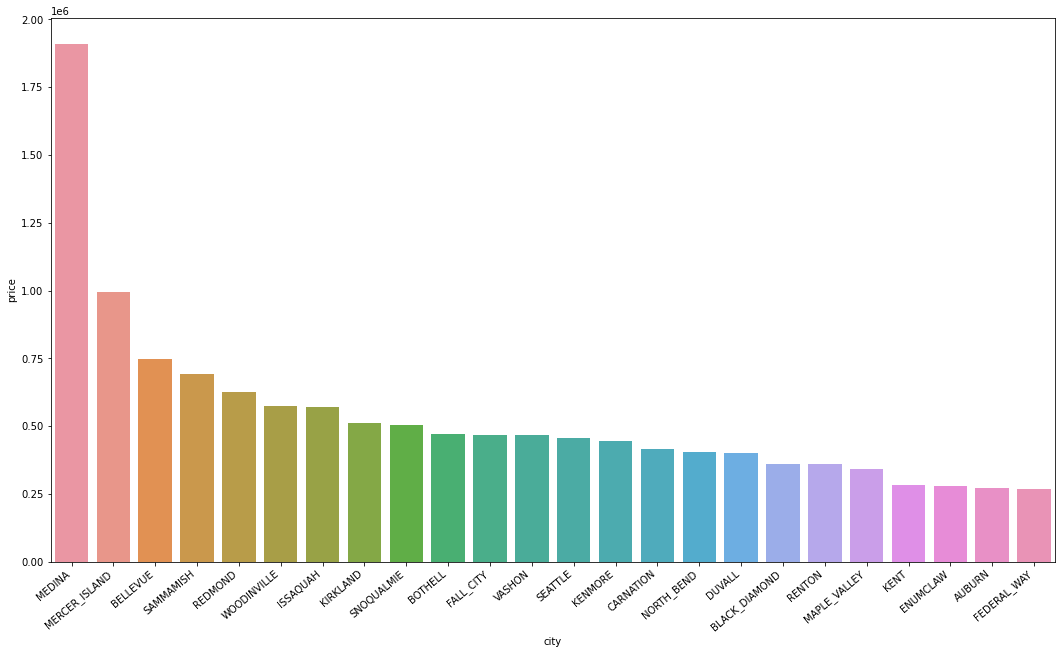

In [63]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(ax=ax, x='city', y = 'price', data= merged.groupby('city').median().reset_index().sort_values(by='price', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

The top 3 most expensive cities to live in are Medina, Mercer Island, and Bellevue
- all of which are neighboring eachother 
- all of which are touching Lake Washington 

In [64]:
merged.groupby('city')['waterfront'].sum()

city
AUBURN            0.0
BELLEVUE         14.0
BLACK_DIAMOND     0.0
BOTHELL           0.0
CARNATION         1.0
DUVALL            0.0
ENUMCLAW          0.0
FALL_CITY         0.0
FEDERAL_WAY       3.0
ISSAQUAH          2.0
KENMORE           1.0
KENT              0.0
KIRKLAND         11.0
MAPLE_VALLEY      1.0
MEDINA            2.0
MERCER_ISLAND    10.0
NORTH_BEND        0.0
REDMOND           4.0
RENTON            4.0
SAMMAMISH        16.0
SEATTLE          73.0
SNOQUALMIE        0.0
VASHON           20.0
WOODINVILLE       2.0
Name: waterfront, dtype: float64

- Despite bordering Lake Washington, Medina (the most expensive city) only has one property listed as waterfront 
- Seattle has the most waterfront properties, but also contains nearly half of all the properties within the dataset

In [65]:
merged['city'].value_counts()

SEATTLE          8857
RENTON           1576
BELLEVUE         1393
KENT             1190
KIRKLAND          974
REDMOND           969
AUBURN            902
SAMMAMISH         792
FEDERAL_WAY       764
ISSAQUAH          728
MAPLE_VALLEY      583
WOODINVILLE       466
SNOQUALMIE        304
KENMORE           281
MERCER_ISLAND     279
ENUMCLAW          232
NORTH_BEND        218
BOTHELL           193
DUVALL            190
CARNATION         123
VASHON            116
BLACK_DIAMOND      99
FALL_CITY          78
MEDINA             49
Name: city, dtype: int64

All cities have ample enough datapoints that will be sufficient for modeling

In [66]:
merged['city'].value_counts(normalize=True)

SEATTLE          0.414731
RENTON           0.073797
BELLEVUE         0.065228
KENT             0.055722
KIRKLAND         0.045608
REDMOND          0.045374
AUBURN           0.042236
SAMMAMISH        0.037086
FEDERAL_WAY      0.035774
ISSAQUAH         0.034089
MAPLE_VALLEY     0.027299
WOODINVILLE      0.021821
SNOQUALMIE       0.014235
KENMORE          0.013158
MERCER_ISLAND    0.013064
ENUMCLAW         0.010863
NORTH_BEND       0.010208
BOTHELL          0.009037
DUVALL           0.008897
CARNATION        0.005760
VASHON           0.005432
BLACK_DIAMOND    0.004636
FALL_CITY        0.003652
MEDINA           0.002294
Name: city, dtype: float64

40% of properties in data set are within Seattle 

# Creating Summary / Split Test Functions

Creating summary and tt_split functions to save myself tedious / repetitive coding

In [67]:
def summary(df, preds): # predictors must be str
    outcome = 'price'
    predictors = preds
    predictor_variables = "+".join(predictors.columns)
    formula = outcome + '~' + predictor_variables
    global model 
    model = ols(formula=formula, data=df).fit()
    return model.summary()

In [68]:
def tt_split(df, preds):
    X = preds
    y = df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
    
    baseline_linreg = LinearRegression()
    baseline_linreg.fit(X_train, y_train)
    y_pred = baseline_linreg.predict(X_test)
    residuals = y_pred - y_test
    
    mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
    mse_test = mean_squared_error(y_test, y_pred)
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    
    return print('Train MSE:', np.sqrt(mse_train), '\n'
                'Test MSE:', np.sqrt(mse_test), '\n'
                'Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train)), fig.show();

# Baseline with Cities (Model 2) 

### Cleaning 

#### Defining/ Calculating "Affordable"

It is safe to assume that recent college graduates will not be looking to purchase a home, but the only available data regarding price is the entire price of the property

To account for this the following measures have been taken: 
- An 'affordable' rent (for a single individual living alone) has been defined as <= 1,146 USD (2015 median rent in King County)
    - source : https://www.deptofnumbers.com/rent/washington/king-county/
- Given the 2015 King County 'affordable rent' value, the median of house price (450,000 USD) will be the maximum threshold for "affordable"
- Given that recent college graduates often live with multiple roommates, I will be assuming the potential for having 3 tennants for a property 
    - Given this assumption, I will not be looking at houses priced over 1,350,000 USD (3x the median price) 


In [69]:
cities_baseline = df[(df['price'] <= 1350000)]

In [70]:
cities_baseline = cities_baseline[(cities_baseline['bedrooms'] < 8)]

There is an extreme outlier (33 bedrooms)
- Considering the target demographic is recent graduates, any house with more than 7 bedrooms will be extravogant 
    - 5 and more is still extravogant, however I do not want to remove too many datapoints

In [72]:
cities_baseline = cities_baseline[(cities_baseline['bathrooms'] > 0.5)]

Removing any datapoints with anything less than .75 bathrooms, as anything less would be uninhabitable 

In [75]:
cities_baseline = pd.merge(cities_baseline, kc_zip, how='left')
 # cities_baseline.info()

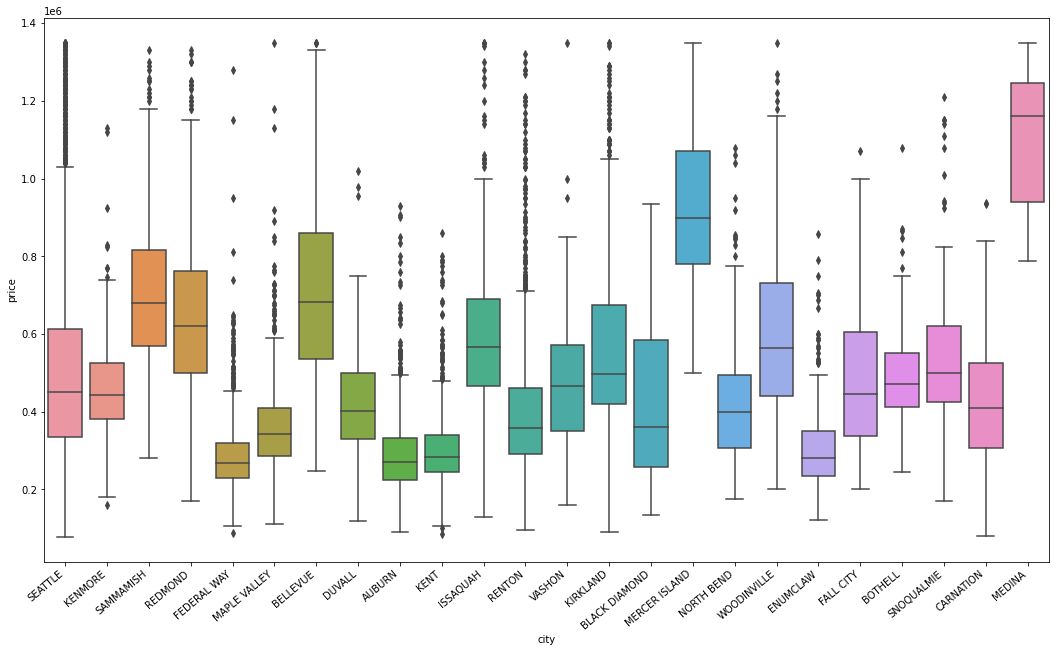

In [77]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(ax=ax, x='city', y = 'price', data= cities_baseline)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

There are still many outliers, however I believe this to be representative of property prices and I will not be removing them
- In a given city / neighborhood there are properties with much higher prices due to a variety of different factors (historical significance, rennovations, waterfront status, architecture, etc.) 
- A model that could not take these outliers into account will be of no use 

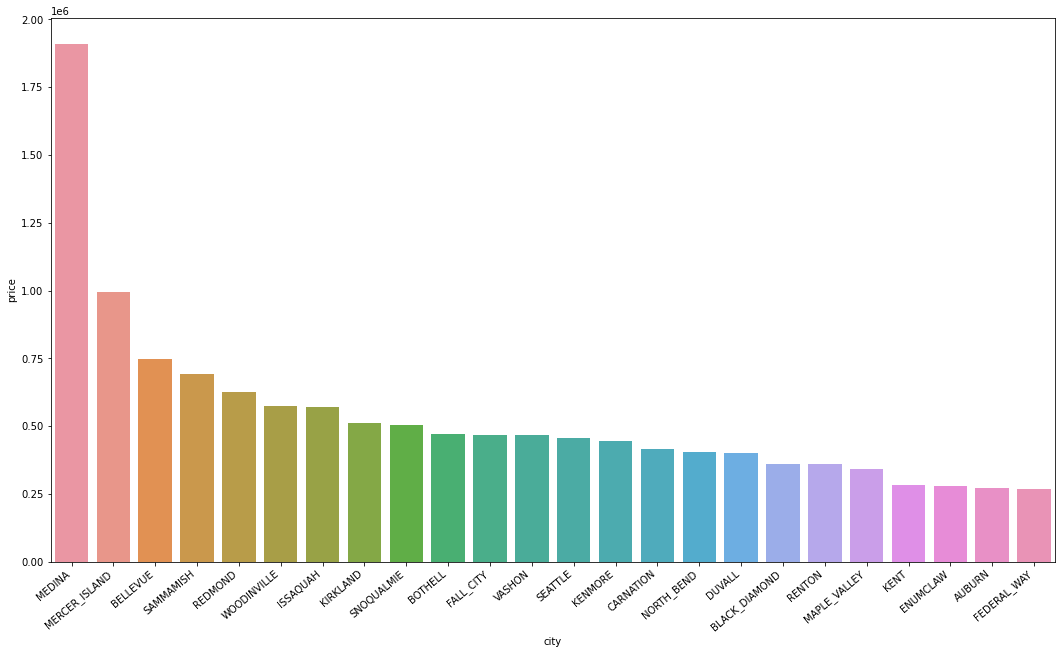

In [78]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(ax=ax, x='city', y = 'price', data= merged.groupby('city').median().reset_index().sort_values(by='price', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

No change in most expensive cities 

In [79]:
cities_baseline['city'] = cities_baseline['city'].str.replace(' ', '_')
city_dummies = pd.get_dummies(cities_baseline['city'], drop_first=True)

In [80]:
cities_baseline = pd.concat([cities_baseline, city_dummies], axis=1)
cities_baseline.drop('city', axis=1, inplace=True)

In [81]:
cities_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20648 entries, 0 to 20647
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20648 non-null  int64  
 1   price          20648 non-null  float64
 2   bedrooms       20648 non-null  int64  
 3   bathrooms      20648 non-null  float64
 4   sqft_living    20648 non-null  int64  
 5   sqft_lot       20648 non-null  int64  
 6   floors         20648 non-null  float64
 7   waterfront     20648 non-null  float64
 8   view           20648 non-null  float64
 9   condition      20648 non-null  int64  
 10  grade          20648 non-null  int64  
 11  sqft_basement  20648 non-null  float64
 12  yr_built       20648 non-null  int64  
 13  yr_renovated   20648 non-null  float64
 14  zipcode        20648 non-null  int64  
 15  lat            20648 non-null  float64
 16  long           20648 non-null  float64
 17  sqft_living15  20648 non-null  int64  
 18  sqft_l

In [82]:
cities_baseline.drop(['id', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

With 'city' being the most informative geographical feature, I am dropping 'zipcode', 'lat', and 'long'
- I am also dropping 'id' as it adds no relevant information to my model

In [83]:
summary(cities_baseline, cities_baseline.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     1551.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:44:37   Log-Likelihood:            -2.7081e+05
No. Observations:               20648   AIC:                         5.417e+05
Df Residuals:                   20610   BIC:                         5.420e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.946e+06   8.97e+04     32.835      0.000    2.77e+06    3.12e+06
bedrooms      -1.353e+04   1264.049    -10.701      0.000    -1.6e+04    -1.1e+04
bathrooms      2.772e+04   2045.579     13.551      0.000    2.37e+04    3.17e+04
sqft_living      70.6022      1.477     47.799      0.000      67.707      73.497
sqft_lot          0.2317      0.030      7.745      0.000       0.173       0.290
floors         3.848e+04   2276.203     16.904      0.000     3.4e+04    4.29e+04
waterfront     1.184e+05   1.39e+04      8.537      0.000    9.12e+04    1.46e+05
view           2.948e+04   1373.594     21.462      0.000    2.68e+04    3.22e+04
condition      2.512e+04   1455.026     17.262      0.000    2.23e+04     2.8e+04
grade           7.55e+04   1367.605     55.206      0.000    7.28e+04    7.82e+04
sqft_basement    -3.7163      2.762     -1.345      0.179      -9.131       1.698
yr_built      -1825.5756     45.857    -39.810      0.000   -1915.459   -1735.693
yr_renovated     11.0800      2.261      4.901      0.000       6.648      15.512
sqft_living15    57.6144      1.401     41.130      0.000      54.869      60.360
sqft_lot15       -0.1277      0.047     -2.737      0.006      -0.219      -0.036
rel_living       12.9878      1.326      9.794      0.000      10.389      15.587
BELLEVUE       2.915e+05   5457.140     53.417      0.000    2.81e+05    3.02e+05
BLACK_DIAMOND  9.492e+04   1.28e+04      7.423      0.000    6.99e+04     1.2e+05
BOTHELL        1.307e+05   9575.537     13.652      0.000    1.12e+05    1.49e+05
CARNATION       1.23e+05   1.19e+04     10.363      0.000    9.97e+04    1.46e+05
DUVALL         1.054e+05   9652.789     10.917      0.000    8.65e+04    1.24e+05
ENUMCLAW       8007.2435   8999.860      0.890      0.374   -9633.194    2.56e+04
FALL_CITY      1.579e+05    1.5e+04     10.558      0.000    1.29e+05    1.87e+05
FEDERAL_WAY   -2.002e+04   5944.609     -3.368      0.001   -3.17e+04   -8368.168
ISSAQUAH       1.826e+05   6096.324     29.958      0.000    1.71e+05    1.95e+05
KENMORE        1.238e+05   8256.099     14.996      0.000    1.08e+05     1.4e+05
KENT           1.112e+04   5320.186      2.091      0.037     696.662    2.16e+04
KIRKLAND       2.421e+05   5675.944     42.651      0.000    2.31e+05    2.53e+05
MAPLE_VALLEY   4.581e+04   6433.295      7.120      0.000    3.32e+04    5.84e+04
MEDINA         6.631e+05   3.65e+04     18.145      0.000    5.91e+05    7.35e+05
MERCER_ISLAND  4.069e+05   9487.341     42.885      0.000    3.88e+05    4.25e+05
NORTH_BEND     1.147e+05   9147.313     12.543      0.000    9.68e+04    1.33e+05
REDMOND         2.39e+05   5663.279     42.197      0.000    2.28e+05     2.5e+05
RENTON         7.345e+04   5045.285     14.559      0.000    6.36e+04    8.33e+04
SAMMAMISH      1.966e+05   6101.638     32.218   

**Interpretation**
- Adding cities (and removing other geographical features) has improved the r-squared value significantly (up nearly 0.4 from baseline)
- Enumclaw appears to be the only city with a large p-value
- bedrooms still has a substantial negative coefficient
    - may need to propose this be looked into further 
- sqft_basement is still negative, but is much smaller
    - for every sqft of basement price only drops 4


**Next Model** 
- I will be dropping 'condition' as it conveys the same information as 'grade'
    - 'grade' is a measure used by the local government, wheras 'condition' might be much more subjective 
- Keeping Enumclaw for now despite p-value (0.332)
    - Considering the massive increase in r-squared by adding the cities, I want to see if tweaking other features will prove that all cities are significantly influential 
- Creating dummy variabels for grade

In [ ]:
tt_split(cities_baseline, cities_baseline.drop('price', axis=1))

**Interpretation**
- After filtering the data based on assumptions based on max price, number of bedrooms, and bathrooms, the residuals seem to be much more normally distributed than the baseline test

# Model 3

There is a strong positive relationship between 'grade' and 'price' 
 - Given there are 11 grades I will first create dummy variables, and then bin the grades based on their coeficients 

### Cleaning

In [ ]:
cities_baseline['grade'].value_counts()

There is a single datapoint where grade = 3

In [ ]:
indexnames = cities_baseline[cities_baseline['grade'] == 3].index
cities_baseline.drop(indexnames, inplace=True)

# Model 3 (cont'd)

In [ ]:
grade_dummies = pd.get_dummies(cities_baseline['grade'], prefix='grade', drop_first=True)
model4 = pd.concat([cities_baseline, grade_dummies], axis=1)
model4.drop(['grade', 'condition'], axis=1, inplace=True)

In [ ]:
summary(model4, model4.drop('price', axis=1))

**Interpretation**
- sqft_basement now has a positive coefficient, but a very large p-value
    - I believe it will be beneficial to drop this feature as its coefficient and p-value has been fluxuating with each model 
- Enumclaw now has a much smaller p-value, but is still well above 0.05
- I will be dropping grades 5 and 6 (based on p-vales) and binning 7-8, 9-10, 11-12


In [ ]:
model4['grade'] = cities_baseline['grade']

In [ ]:
# binning 
bins = [4,6,8,10,13]
model4['bin_grade'] = pd.cut(model4['grade'], bins)

# Cleaning what will become the column titles for each grade so as to not cause any
# problems when put into the model formula
model4['bin_grade'] = model4['bin_grade'].astype(str)
model4['bin_grade'] = model4['bin_grade'].str.replace(' ', '')
model4['bin_grade'] = model4['bin_grade'].str.replace('(', '')
model4['bin_grade'] = model4['bin_grade'].str.replace(']', '')
model4['bin_grade'] = model4['bin_grade'].str.replace(',', 'thru')
model4['bin_grade'] = model4['bin_grade'].str.replace('.0', '')

bin_dummies = pd.get_dummies(model4['bin_grade'], drop_first=True)
bin_dummies.drop('nan', axis=1, inplace=True)

# more cleaning column names to be more comprehendable / straightforward in summary 
bin_dummies['grade_7thru8'] = bin_dummies['6thru8']
bin_dummies['grade_9thru10'] = bin_dummies['8thru']
bin_dummies['grade_10thru12'] = bin_dummies['thru13']
bin_dummies.drop(['6thru8', '8thru', 'thru13'], axis=1, inplace=True)

# concatinating 
model4 = pd.concat([model4, bin_dummies], axis=1)

#dropping redundant columns
model4.drop(['grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 
             'grade_12', 'sqft_basement', 'grade', 'bin_grade'], axis=1, inplace=True)

In [ ]:
summary(model4, model4.drop('price', axis=1))

# Model 4 

In [ ]:
model4['view'] = model4.view.astype(str)

In [ ]:
model4['view'] = model4['view'].str.replace('.0', '')

In [ ]:
model4['view'].value_counts()

In [ ]:
view_dummies = pd.get_dummies(model4['view'], prefix='view', drop_first=True)

In [ ]:
view_dummies

In [ ]:
model4 = pd.concat([model4, view_dummies], axis=1)

In [ ]:
model4.drop('view', axis=1, inplace=True)

In [ ]:
model4.info()

In [ ]:
summary(model4, model4.drop('price', axis=1))

In [ ]:
summary(model4, model4.drop(['price', 'FEDERAL_WAY'], axis=1))

In [ ]:
tt_split(model4, model4.drop('price', axis=1))

In [ ]:
sns.scatterplot(x='bedrooms', y='price', data=model4)

In [ ]:
df_model12 = df_model11.drop(['grade_5', 'grade_6'], axis=1)

In [ ]:
summary(df_model12, df_model12.drop('price', axis=1))

In [ ]:
df_model12 = pd.concat([df_model12, grade_col], axis=1)

In [ ]:
bins = [6,8,13]
df_model12['bin_grade'] = pd.cut(df_model12['grade'], bins)

In [ ]:
df_model12['bin_grade'].isna().sum()

In [ ]:
df_model12['bin_grade'].value_counts()

In [ ]:
df_model12['bin_grade'] = df_model12['bin_grade'].astype(str)
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('.0', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(' ', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('(', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(']', '')


In [ ]:
grade_bin_dummies = pd.get_dummies(df_model12['bin_grade'], drop_first=True)
df_model12 = pd.concat([df_model12, grade_bin_dummies], axis=1)
df_model12.drop(['nan', 'bin_grade'], axis=1, inplace=True)

In [ ]:
df_model12['grade_9thru13'] = df_model12['8,13']
df_model12.drop(['8,13', 'grade', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'], axis=1, inplace=True)

In [ ]:
summary(df_model12, df_model12.drop('price', axis=1))

In [ ]:
tt_split(model4, model4.drop('price', axis=1))

# Model 3

In [ ]:
df_model3 = df_model2

In [ ]:
df_model3.describe()

**Outliers**
- Max 33 bedrooms is an extreme outlier
- Min 0.5 bathroom seems to be a mistake

In [ ]:
df_model3['bedrooms'].value_counts()

- 33 Bedrooms is certianly a mistake
- Based on my business problem, I do not believe recent graduates will be looking for houses with over 7 bedrooms
    - I do not believe recent graduates would be looking at anything with more than 5 bedrooms, but for the sake of keeping data I will only prune bedrooms > 7
    - this will remove 51 datapoints

In [ ]:
df_model3 = df_model3[(df_model3['bedrooms'] < 8)]

In [ ]:
df_model3[(df_model3['bathrooms'] < 0.75)]

- I am making the assumption that any property with less than .75 bathroom (sink, bath/shower, toilet) is not a feasible living space 

In [ ]:
df_model3= df_model3[(df_model3['bathrooms'] > 0.5)]

In [ ]:
summary(df_model3, df_model3.drop('price', axis=1))

**Interpretation**
- With nearly identical results to model 2, the removed 'outliers' have had little positive change on the fit of the model
    - that being said rsquared = .708 is not terrible
- sqft_basement p value has increased by 0.1, so I will be dropping it for the next model

In [ ]:
tt_split(df_model3, df_model3.drop('price', axis=1))

- MSEs of Train and Test samples are very close (0.7%)
    - this is not a large change from model 2 (1%)

# Model 4

Removing 'sqft_basement'

In [ ]:
df_model4 = df_model3

In [ ]:
df_model4.drop('sqft_basement', axis=1, inplace=True)

In [ ]:
summary(df_model4, df_model4.drop('price', axis=1))

In [ ]:
tt_split(df_model4, df_model4.drop('price', axis=1))

# Model 5

**Steps Taken For New Model**
- Create dummy variables for categorical data
- Remove 'condition' column (conveys same information as 'grade')

In [ ]:
df_model5 = df_model4.drop('condition', axis=1)

In [ ]:
df_model5['view'] = df_model5['view'].astype(int)

In [ ]:
view_dummies = pd.get_dummies(df_model5['view'], prefix = 'view_', drop_first=True)
grade_dummies = pd.get_dummies(df_model5['grade'], prefix = 'grade_', drop_first=True)

In [ ]:
df_model5 = pd.concat([df_model5, view_dummies, grade_dummies], axis=1)

In [ ]:
df_model5.drop(columns=['view', 'grade'], inplace=True)

In [ ]:
summary(df_model5, df_model5.drop('price', axis=1))

In [ ]:
tt_split(df_model5, df_model5.drop('price', axis=1))

# Model 6

In [ ]:
df_model6 = df_model5.drop(['grade__4', 'grade__5', 'grade__6', 'grade__7', 'grade__8', 'grade__9', 'grade__10'], axis=1)

In [ ]:
summary(df_model6, df_model6.drop('price', axis=1))

In [ ]:
tt_split(df_model6, df_model6.drop('price', axis=1))

In [ ]:
df_model7 = df_model6.drop('grade__12', axis=1)

In [ ]:
summary(df_model7, df_model7.drop('price', axis=1))

In [ ]:
tt_split(df_model7, df_model7.drop('price', axis=1))

# Model 8

In [ ]:
df_model8 = merged

In [ ]:
city_dummies = pd.get_dummies(df_model8['city'], drop_first=True)
df_model8 = pd.concat([df_model8, city_dummies], axis=1)
df_model8.drop('city', axis=1, inplace=True)

In [ ]:
df_model8.info()

In [ ]:
summary(df_model8, df_model8.drop('price', axis=1))

# Model 9

In [ ]:
df_model9 = df_model8.drop(['VASHON', 'WOODINVILLE', 'sqft_lot15', 'zipcode', 'lat', 'long'], axis=1)

In [ ]:
summary(df_model9, df_model9.drop('price', axis=1))

In [ ]:
tt_split(df_model9, df_model9.drop('price', axis=1))

The MSE of the training data is higher than the testing data

In [ ]:
df_model9.info()

# Model 10

In [ ]:
df_model10 = cities_baseline.drop('condition', axis=1)

In [ ]:
indexnames = df_model10[(df_model10['grade'] == 3)].index
df_model10 = df_model10.drop(indexnames)

#creating for later concatination 
grade_col = df_model10['grade']
view_col = df_model10['view']

'grade' = 3 offered little / confusing information for the model as there was only one corresponding datapoint

In [ ]:
df_model10['view'] = df_model10['view'].astype(int)

view_dummies = pd.get_dummies(df_model10['view'], prefix='view', drop_first=True)

grade_dummies = pd.get_dummies(df_model10['grade'], prefix='grade', drop_first=True)

In [ ]:
df_model10.drop(['view', 'grade'], axis=1, inplace=True)

In [ ]:
df_model10 = pd.concat([df_model10, view_dummies, grade_dummies], axis=1)

In [ ]:
summary(df_model10, df_model10.drop('price', axis=1))

In [ ]:
tt_split(df_model10, df_model10.drop('price', axis=1))

# Model 11

In [ ]:
df_model11 = df_model10.drop(['ENUMCLAW', 'sqft_basement'], axis=1)

In [ ]:
summary(df_model11, df_model11.drop('price', axis=1))

# Model 12

There is a strong positive relationship between 'grade' and 'price' so I do not want to drop a majority of the 'grade' columns... so I will attempt binning 

In [ ]:
# df_model12 = cities_baseline.drop('condition', axis=1)

In [ ]:
df_model12 = df_model11.drop(['grade_5', 'grade_6'], axis=1)

In [ ]:
summary(df_model12, df_model12.drop('price', axis=1))

In [ ]:
df_model12 = pd.concat([df_model12, grade_col], axis=1)

In [ ]:
bins = [6,8,13]
df_model12['bin_grade'] = pd.cut(df_model12['grade'], bins)

In [ ]:
df_model12['bin_grade'].isna().sum()

In [ ]:
df_model12['bin_grade'].value_counts()

In [ ]:
df_model12['bin_grade'] = df_model12['bin_grade'].astype(str)
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('.0', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(' ', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('(', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(']', '')


In [ ]:
grade_bin_dummies = pd.get_dummies(df_model12['bin_grade'], drop_first=True)
df_model12 = pd.concat([df_model12, grade_bin_dummies], axis=1)
df_model12.drop(['nan', 'bin_grade'], axis=1, inplace=True)

In [ ]:
df_model12['grade_9thru13'] = df_model12['8,13']
df_model12.drop(['8,13', 'grade', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'], axis=1, inplace=True)

In [ ]:
summary(df_model12, df_model12.drop('price', axis=1))

### Exploring Date

In [ ]:
df['date'].value_counts()


It would appear that the bulk of sales are happening in June
- seems as though sales are from 2014 and 2015

In [ ]:
sns.countplot(x=df['month'])

Most properties are being bought/sold between April - July
- Highest frequency = May 

In [ ]:
sns.barplot(x='month', y='price', data= df.groupby(df['month']).median().reset_index())

While more houses are being bought/sold during April - July, there does not seem to be a large difference between the median prices of houses sold on a month to month basis

In [ ]:
sns.boxplot(x=df['month'], y=df['price'])

The 'price' column seems to be riddled with outliers
- Outliers seem to begin around $100mil
- This will be influential when testing residuals for normality 

### Exploring sqft_basement

In [ ]:
sns.scatterplot(x= df['sqft_basement'], y = df['price'])

In [ ]:
basement_grouped = df.groupby('sqft_basement').median().reset_index()

In [ ]:
sns.barplot(x = basement_grouped['sqft_basement'], y = basement_grouped['price'])
sns.set(rc={'figure.figsize':(18,12)})


There seems to be a positive relationship between sqft_basement and price

In [ ]:
only_basements = df[df.sqft_basement != 0]

In [ ]:
sns.scatterplot(x= only_basements['sqft_basement'], y = only_basements['price'])

### Exploring lat/long/zipcode 

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], hue = df['price'])

Comparing this plot ot a map of King County, the lat and long data seems to be quite accurate 

**Observations**
- Most expensive properties are in the North (above lat = 47.5)
- Many of the higher priced properties appear to be clustered around bodies of water (Lake Washington, Lake Sammamish, Elliot Bay, Lake Union, etc.)
- The most Eastward properties are much less expensive, but are located approx 60 miles outside of Seattle (1.5 hour drive)

In [ ]:
zip_grouped = df.groupby('zipcode').median().reset_index()

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], hue = df['zipcode'], palette = 'bright')

There are a lot of zipcodes... I don't know if it'll be worth the time aggregating them into larger groups 
- It might be better to create 4-8 geographical areas based on long and lat 

### Exploring yr_built

In [ ]:
new_properties = df.groupby('yr_built').median().reset_index()


In [ ]:
new_properties

The data consists of properties that were built each year from 1900 to 2015

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'price', data= new_properties)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
cheap_yrs = new_properties[(new_properties['yr_built'] >= 1930) & (new_properties['yr_built'] <= 1973)]

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'price', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


Houses built 1932 - 1936 and 1942 - 1944 appear to have the lowest (median) prices 

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'grade', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

The grade lower grade of the houses built 1932 - 1936 and 1942 - 1944 seem to reflect their lower prices

In [ ]:
ax = sns.countplot(x = 'grade', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
df['grade'].value_counts()

In [ ]:
over_1945 = new_properties[(new_properties['yr_built'] > 1945)]

ax = sns.barplot(x = 'yr_built', y ='grade', data= over_1945)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:

ax = sns.barplot(x = 'yr_built', y ='price', data= over_1945)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
zip_grouped[['zipcode', 'yr_built']]

In [ ]:
oldest_zip = zip_grouped[(zip_grouped['yr_built'] == 1926)] 

In [ ]:
oldest_zip

In [ ]:
new_zip = zip_grouped.sort_values(by='price', ascending=False).reset_index()

In [ ]:
new_zip[(new_zip['yr_built'] == 1926)]

"oldest" does not correspond with "cheapest", considering the two oldest zipcodes are within the top 10 most expensive zip codes

In [ ]:
cheapest_zips = new_zip.iloc[-10: -1].drop('index', axis=1)

In [ ]:
cheapest_zips

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], palette = 'bright')

In [ ]:
df[(df['zipcode'] == 98002)].sort_values(by='price', ascending=False)